<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [1]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [2]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

<ipython-input-2-b3fdaf15785b>:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


#### Read the dataset in the csv file from the URL


In [3]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [4]:
boston_df=pd.read_csv(boston_url)
boston_df

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,9.67,22.4
502,502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,9.08,20.6
503,503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,5.64,23.9
504,504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,6.48,22.0


#### Add your code below following the instructions given in the course to complete the peer graded assignment


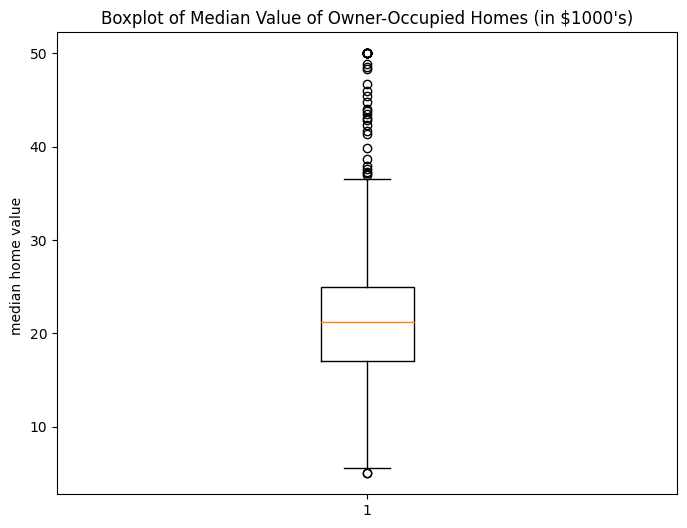

In [20]:

pyplot.figure(figsize=(8, 6))
pyplot.boxplot(boston_df["MEDV"])
pyplot.ylabel("median home value ")
pyplot.title("Boxplot of Median Value of Owner-Occupied Homes (in $1000's)")
pyplot.show()












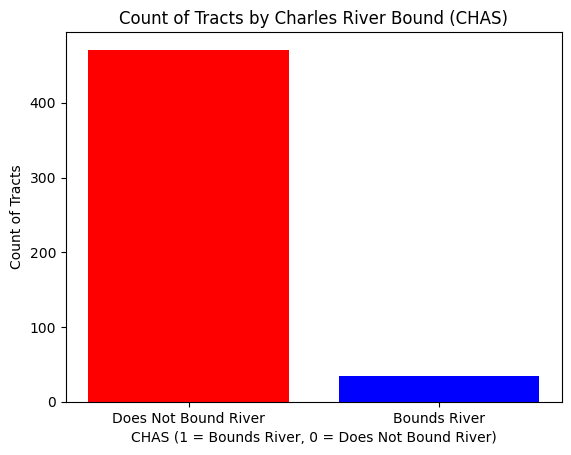

In [31]:
chas=boston_df["CHAS"].value_counts()

pyplot.bar(chas.index,chas.values,color=["red","blue"])
pyplot.xlabel("CHAS (1 = Bounds River, 0 = Does Not Bound River)")
pyplot.ylabel("Count of Tracts")
pyplot.title("Count of Tracts by Charles River Bound (CHAS)")
pyplot.xticks([0, 1], ['Does Not Bound River', 'Bounds River'])
pyplot.show()

<ipython-input-47-bb93afaaee65>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datas['AGE'] = boston_df['AGE'].apply(age_category)


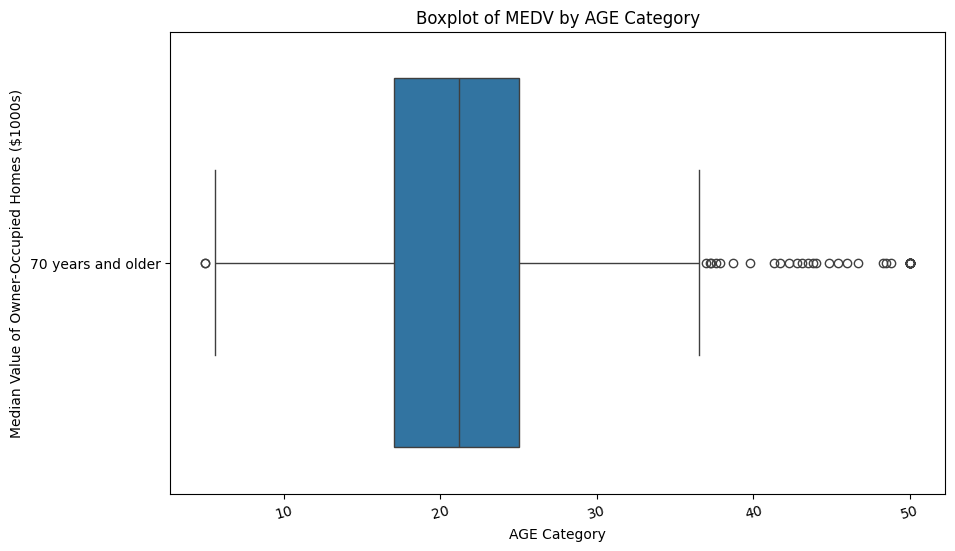

In [47]:
def age_category(age):
    if age <= 0.35:
        return '35 years and younger'
    elif 0.35 < age <= 0.70:
        return 'Between 35 and 70 years'
    else:
        return '70 years and older'

# Create a new column for AGE category
datas=boston_df[["MEDV","AGE"]]
datas['AGE'] = boston_df['AGE'].apply(age_category)

pyplot.figure(figsize=(10, 6))
sns.boxplot(data=datas,x="MEDV",y="AGE")
pyplot.title('Boxplot of MEDV by AGE Category')
pyplot.xlabel('AGE Category')
pyplot.ylabel('Median Value of Owner-Occupied Homes ($1000s)')
pyplot.xticks(rotation=15)
pyplot.show()


<AxesSubplot:xlabel='INDUS', ylabel='NOX'>

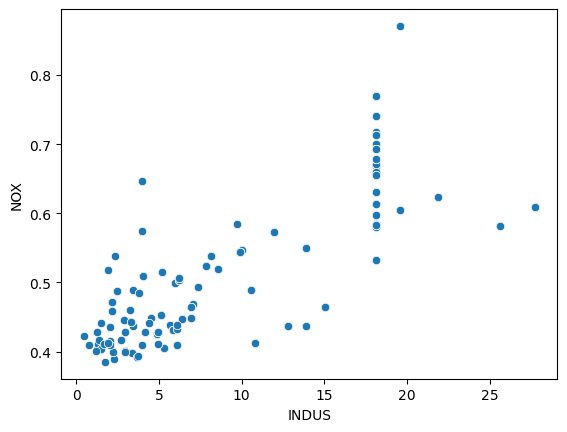

In [49]:
sns.scatterplot(x="INDUS",y="NOX",data=boston_df)

<AxesSubplot:xlabel='PTRATIO', ylabel='Count'>

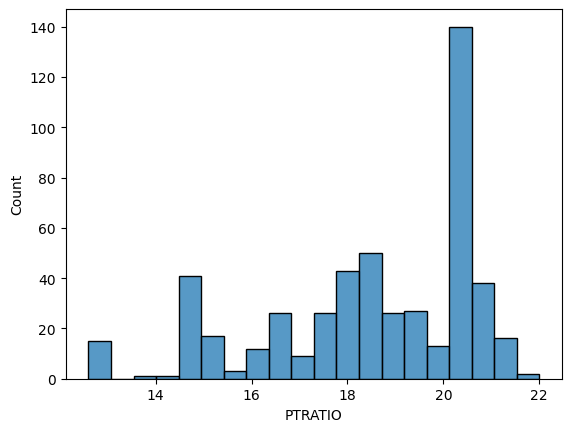

In [51]:
sns.histplot(boston_df["PTRATIO"],bins=20)